In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import logit



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.447984
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               CT_Virus   No. Observations:                  165
Model:                          Logit   Df Residuals:                      163
Method:                           MLE   Df Model:                            1
Date:                Mon, 23 May 2022   Pseudo R-squ.:                  0.3389
Time:                        19:38:22   Log-Likelihood:                -73.917
converged:                       True   LL-Null:                       -111.81
Covariance Type:            nonrobust   LLR p-value:                 3.170e-18
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.1412      0.267     -4.278      0.000      -1.664      -0.618
CT_Infectious    23.0532      3.926      5.872      0.000      15.359      30.747
=================================================================================
"""

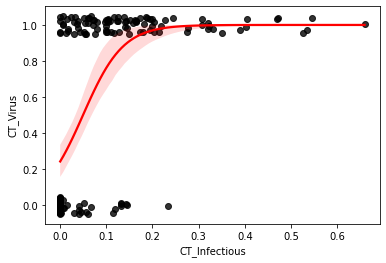

In [ ]:
#import dataset from CSV file on Github
url = "https://raw.githubusercontent.com/ChamteutOh/WBE/main/Data_Logistic_Regression.csv?token=GHSAT0AAAAAABU3ZIXE3K7LDXE6MRWMUSW2YUL4KJA"
df = pd.read_csv(url)
df = df.apply (pd.to_numeric, errors='coerce')
df = df[df['CT_PCR'].notna()]
df['CT_Virus'] = np.where(df['CT_PCR']>0, 1, 0)
#define the predictor variable and the response variable
x = df['CT_Infectious']
y = df['CT_Virus']
#plot logistic regression curve
sns.regplot(x=x, y=y, data=df, label=x, logistic=True, y_jitter=.05,  scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

#statistics
formula = ('CT_Virus ~ CT_Infectious')
model = logit(formula = formula, data = df).fit()
model.summary()


In [ ]:
import math
def sigmoid(x):
  return (1 / (1 + math.exp(-x)))

In [ ]:
def prediction_function(x):
    z = 23.0532 * x -1.1412
    y = sigmoid(z)
    return y

In [ ]:
x = 0.144815
print(prediction_function(x))

0.9000022122379887
